# HOMEWORK: k-Nearest Neighbors

In [2]:
import os

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn import model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = pd.read_csv('/Users/matanefron/ds_class_2017_new/DS-SF-32/lessons/lesson-8/dataset-boston.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Question 1.  
+ Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  
+ Please create a new variable `MEDV_Category` that stores the level number
+ Remember the quantile function
+ Remember how to segment your pandas data frame

In [5]:
print df['MEDV'].quantile(.2)
print df['MEDV'].quantile(.5)
print df['MEDV'].quantile(.8)

15.3
21.2
28.2


In [19]:
q1 = df['MEDV'].quantile(.2)
q2 = df['MEDV'].quantile(.5)
q3 = df['MEDV'].quantile(.8)

def classify_medv(x):
    if x < q1:
        return 0
    elif x >= q1 and x < q2:
        return 1
    elif x >= q2 and x < q3:
        return 2
    elif x >= q3:
        return 3

df['medv_category'] = df['MEDV'].map(classify_medv)

In [20]:
classify_medv(df['MEDV'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,medv_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3


### Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

## Question 2.  

+ First normalize `RM`, `PTRATIO`, and `LSTAT`.  
+ By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

+ Check out the documentation for MinMaxScaler()

In [8]:
from sklearn.preprocessing import MinMaxScaler

### We use .fit instead of .fit_transform because .fit saves the scaler, while .fit_transform does not save the scale, it takes the data and automatically transform it.

In [9]:
mmsRM = MinMaxScaler(feature_range=(0, 1))
mmsRM.fit(df['RM'])
df['RM'] = mmsRM.transform(df['RM'])

/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [10]:
mmsP = MinMaxScaler()
mmsP.fit(df['PTRATIO'])
df['PTRATIO'] = mmsP.transform(df['PTRATIO'])

/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [11]:
mmsL = MinMaxScaler()
mmsL.fit(df['LSTAT'])
df['LSTAT'] = mmsP.transform(df['LSTAT'])

/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,medv_category
0,0.00632,18.0,2.31,0,0.538,0.577505,65.2,4.0900,1,296,0.287234,396.90,-0.810638,24.0,2
1,0.02731,0.0,7.07,0,0.469,0.547998,78.9,4.9671,2,242,0.553191,396.90,-0.368085,21.6,2
2,0.02729,0.0,7.07,0,0.469,0.694386,61.1,4.9671,2,242,0.553191,392.83,-0.911702,34.7,3
3,0.03237,0.0,2.18,0,0.458,0.658555,45.8,6.0622,3,222,0.648936,394.63,-1.027660,33.4,3
4,0.06905,0.0,2.18,0,0.458,0.687105,54.2,6.0622,3,222,0.648936,396.90,-0.773404,36.2,3


## Question 3.  

+ Run a k-NN classifier with 5 nearest neighbors and report your misclassification error; set weights to uniform
+ Calculate your misclassification error on the training set

In [13]:
df.shape

(506, 15)

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [15]:
X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['medv_category'].values

In [16]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, stratify=y, train_size=.80)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(404, 3) (102, 3)
(404,) (102,)


In [17]:
model = knn.fit(trainX, trainY)

In [18]:
y_predict = model.predict(testX)

In [68]:
model.score(testX, testY)

0.65686274509803921

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

cnf_mtx = confusion_matrix(testY, y_predict)
print cnf_mtx

print classification_report(y_predict, testY)

[[15  5  0  0]
 [ 4 17  9  0]
 [ 0 15 15  1]
 [ 0  0  1 20]]
             precision    recall  f1-score   support

          0       0.75      0.79      0.77        19
          1       0.57      0.46      0.51        37
          2       0.48      0.60      0.54        25
          3       0.95      0.95      0.95        21

avg / total       0.66      0.66      0.65       102



Confusion matrix, without normalization
[[ 87  13   1   0]
 [ 24 107  19   0]
 [  3  40 102   8]
 [  0   5  12  85]]


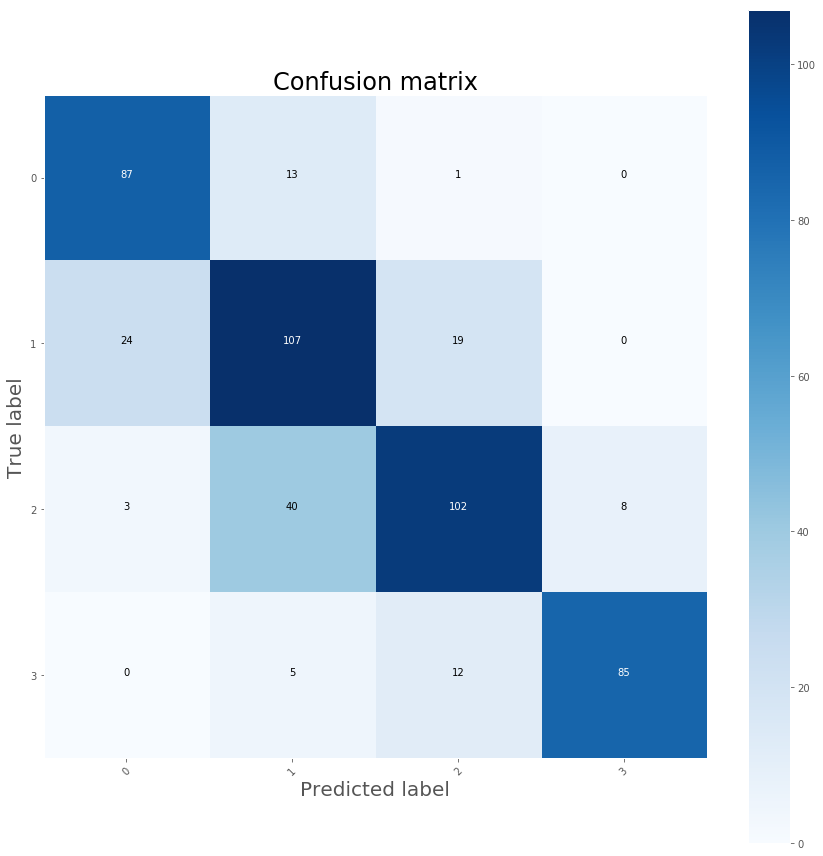

In [97]:
import itertools
from itertools import cycle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels([0,1,2,3])
    ax.set_yticklabels([0,1,2,3])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

class_names = df.medv_category.unique()

plot_confusion_matrix(cnf_mtx, classes=class_names,
                      title='Confusion matrix')

plt.show()


In [70]:
from sklearn.metrics import accuracy_score

print 'Error Rate', 1 - accuracy_score(testY, y_predict)

Error Rate 0.343137254902


## Question 4. 
+ Is this error reliable? 
+ What could we do to make it better?

In [71]:
y_predict_full = model.predict(X)
model.score(X, y)

0.75296442687747034

In [98]:
cnf_mtx = confusion_matrix(y, y_predict_full)
print cnf_mtx

print classification_report(y_predict_full, y)

[[ 87  13   1   0]
 [ 24 107  19   0]
 [  3  40 102   8]
 [  0   5  12  85]]
             precision    recall  f1-score   support

          0       0.86      0.76      0.81       114
          1       0.71      0.65      0.68       165
          2       0.67      0.76      0.71       134
          3       0.83      0.91      0.87        93

avg / total       0.76      0.75      0.75       506



Confusion matrix, without normalization
[[ 87  13   1   0]
 [ 24 107  19   0]
 [  3  40 102   8]
 [  0   5  12  85]]


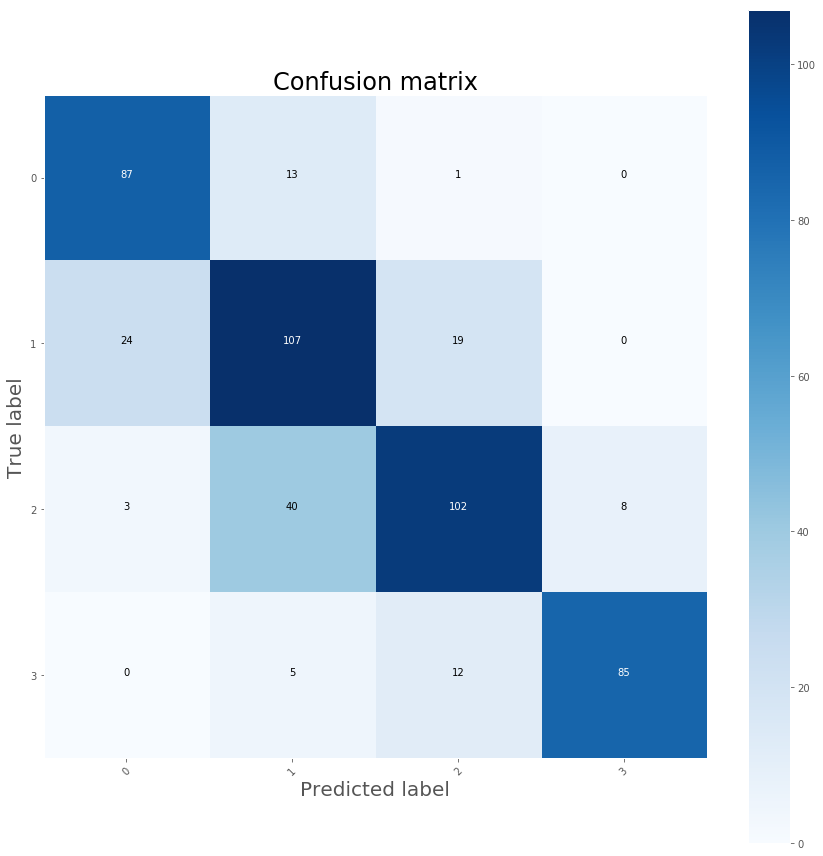

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels([0,1,2,3])
    ax.set_yticklabels([0,1,2,3])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

class_names = df.medv_category.unique()

plot_confusion_matrix(cnf_mtx, classes=class_names,
                      title='Confusion matrix')

plt.show()

In [100]:
print 'Error Rate', 1 - accuracy_score(y, y_predict_full)

Error Rate 0.247035573123


<span style='font-size:1.5em; color:blue'>Based off of these 3 predictors, the algorithm on the entire dataset shows a 23% error rate, which isn't great. We will need to perform grid search to optimize our algorithm.</span>

## Question 5.  
+ Now use 10-fold cross-validation to choose the most efficient `k`

In [74]:
params = {
    'n_neighbors':range(2,30),
    'weights':['uniform', 'distance']
}
gs = grid_search.GridSearchCV(knn, params, cv=10, verbose=1)

In [75]:
gs.fit(trainX, trainY)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    2.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

## Question 6.  

+ Explain your findings
+ What were your best parameters?
+ What was the best k?
+ What was the best model?

In [76]:
print 'best estimator: ', gs.best_estimator_
print 'best param: ', gs.best_params_
print 'best score: ', gs.best_score_

best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
best param:  {'n_neighbors': 10, 'weights': 'distance'}
best score:  0.70297029703


## Question 7.  

+ Train your model with the optimal `k` you found above 
+ (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [77]:
knn_best = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='distance')

In [78]:
model_best = knn_best.fit(trainX, trainY)
predict_best = model_best.predict(testX)
print 'error: ', 1 - model_best.score(testX, testY)

error:  0.294117647059


In [79]:
predict_best_full = model_best.predict(X)
print 'error: ', 1 - model_best.score(X, y)

error:  0.0592885375494


In [102]:
best_test_cnf_mtx = confusion_matrix(testY, predict_best)
best_cnf_mtx = confusion_matrix(y, predict_best_full)

Confusion matrix, without normalization
[[16  4  0  0]
 [ 4 19  7  0]
 [ 1 11 18  1]
 [ 0  0  2 19]]


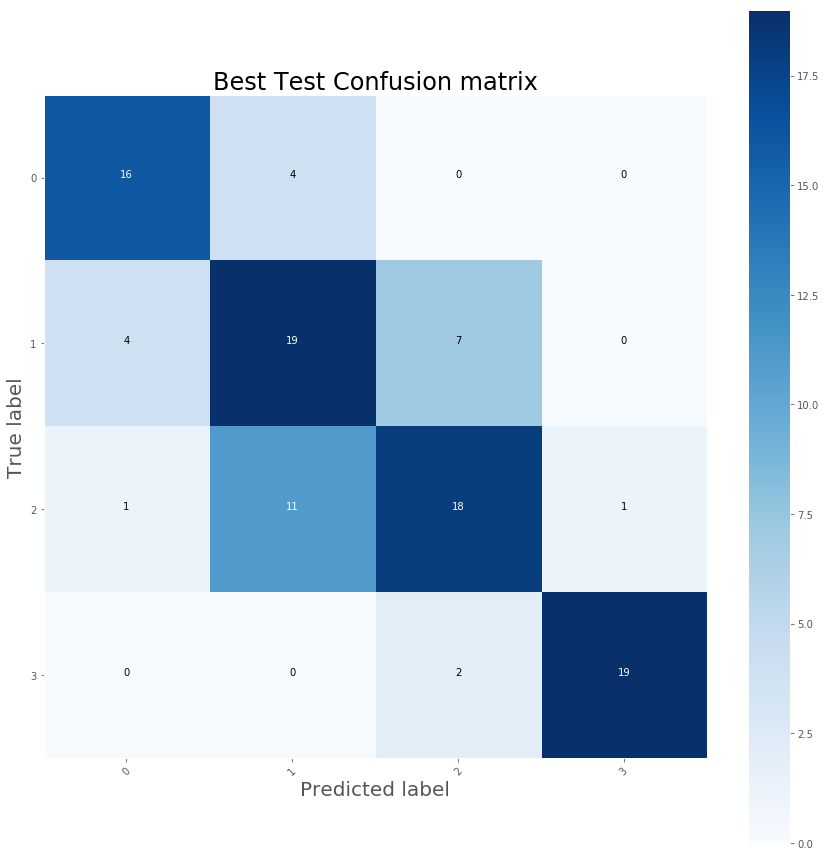

In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels([0,1,2,3])
    ax.set_yticklabels([0,1,2,3])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

class_names = df.medv_category.unique()

plot_confusion_matrix(best_test_cnf_mtx, classes=class_names,
                      title='Best Test Confusion matrix')

plt.show()

Confusion matrix, without normalization
[[ 97   4   0   0]
 [  4 139   7   0]
 [  1  11 140   1]
 [  0   0   2 100]]


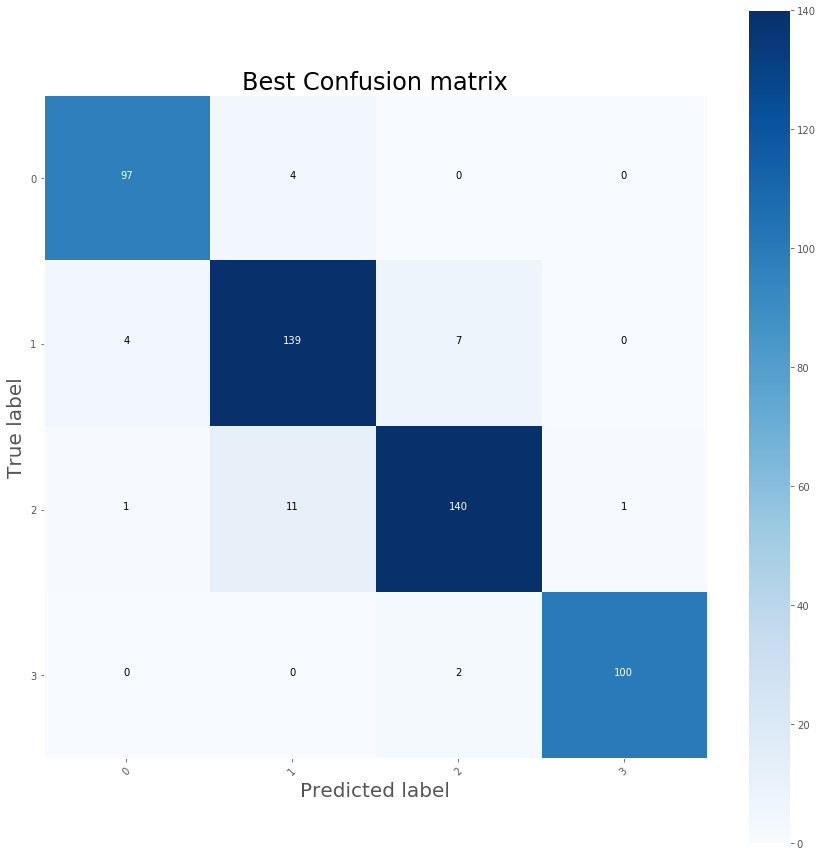

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels([0,1,2,3])
    ax.set_yticklabels([0,1,2,3])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

class_names = df.medv_category.unique()

plot_confusion_matrix(best_cnf_mtx, classes=class_names,
                      title='Best Confusion matrix')

plt.show()

In [106]:
print classification_report(testY, predict_best)
print '=================================================='
print classification_report(y, predict_best_full)

             precision    recall  f1-score   support

          0       0.76      0.80      0.78        20
          1       0.56      0.63      0.59        30
          2       0.67      0.58      0.62        31
          3       0.95      0.90      0.93        21

avg / total       0.71      0.71      0.71       102

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       101
          1       0.90      0.93      0.91       150
          2       0.94      0.92      0.93       153
          3       0.99      0.98      0.99       102

avg / total       0.94      0.94      0.94       506



<span style='font-size:1.5em; color:blue'>The grid search performed much better with a 5.7% error rate on the full dataset</span>

## Question 8.  

+ After training your model with that `k`, 
+ use it to *predict* the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`
+ If you are confused, check out the sklearn documentation for KNN

In [82]:
X.columns.tolist()

['RM', 'PTRATIO', 'LSTAT']

In [83]:
rm_test = mmsRM.transform([2])
p_test = mmsP.transform([19])
l_test = mmsL.transform([3.5])

/Users/edwardlee/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/edwardlee/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/edwardlee/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1,

In [88]:
model_best.predict([rm_test[0], p_test[0], l_test[0]])

/Users/edwardlee/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

- RM: average number of rooms per dwelling
- PTRATIO: pupil-teacher ratio by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

<span style='font-size:1.5em; color:blue'>With 2 dwelling rooms, a 19:1 pupil:teacher ratio and 3.5% lower status predicts a quantile between 20-50% in median income.</span>